# Гордионок М8О-209Б-19

## Матрицы
3)	Считайте два числа – размер матрицы. Считайте элементы этой матрицы. Если матрица не квадратная, посчитайте определитель наибольшей квадратной подматрицы. Таких подматриц будет много – выведите на печать максимальное значение определителя для них, и отвечающую ему подматрицу.

In [56]:
import numpy as np

a = []
n, m = map(int, input('Введите размеры матрицы: ').split())

print('Введите матрицу: ')

for i in range(n):
    a.append(list(map(float, input().split())))

arr = np.array(a)


det = -float('inf')
deta = arr

if n == m:
    det = round(np.linalg.det(arr), 6)
    
elif n > m:
    for i in range(n - m + 1):
        q = round(np.linalg.det(arr[i : m + i]), 6)
        if q > det:
            det = q
            deta = arr[i : m + i]
    
else:
    for i in range(m - n + 1):
        q = round(np.linalg.det(arr[:,i : n + i]), 6)
        if q > det:
            det = q
            deta = arr[:,i : n + i]
            
print()
print(det)
print(deta)

    

Введите размеры матрицы: 2 2
Введите матрицу: 
1 2
3 4

-2.0
[[1. 2.]
 [3. 4.]]


## Символьные вычисления

### 4)	Считайте функцию от символьной переменной t. Считайте два числа – пределы изменения t. Выведите график этой функции, а также точками отметьте на графике её экстремумы.

f(t) = t*t
Пределы: -1 1


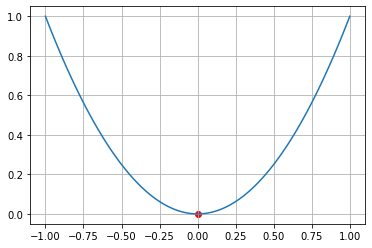

In [80]:
import sympy as sym
import matplotlib.pyplot as plt

t = sym.Symbol('t')

func = sym.sympify(input('f(t) = '))

a, b = map(float, input('Пределы: ').split())

x = np.linspace(a, b, 100)
y = []
for i in x:
    y.append(func.subs(t, i))
    
func_deriv = sym.diff(func, t, 1)
for i in sym.solve(func_deriv, t):
     plt.scatter(i, func.subs(t, i), c='r')
        
plt.plot(x, y)
plt.grid(True)
plt.show()

### 8) Решите систему уравнений  

{ (x + 2y)(2x - y + 1) = 6

{ (2x - y + 1) / (x + 2y) = 2/3

In [179]:
from sympy.solvers.solveset import nonlinsolve
x, y = sym.symbols('x, y', real=True)

nonlinsolve([(x + 2*y)*(2*x - y + 1) - 6,  (2*x - y + 1) / (x + 2*y) - 2/3], [x, y])

FiniteSet((-1.8, -0.6), (1.0, 1.0))

In [180]:
f1 = sym.simplify('(x + 2*y)*(2*x - y + 1)')
f2 = sym.simplify('(2*x - y + 1) / (x + 2*y)')
f1 = sym.Eq(f1, 6)
f2 = sym.Eq(f2, 2/3)

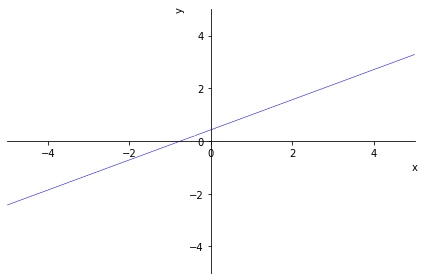

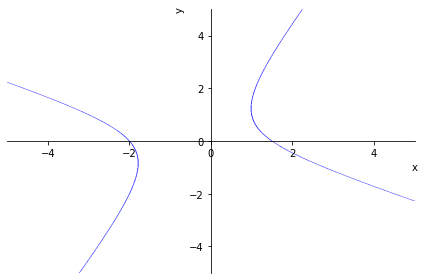

In [181]:
p1 = sym.plot_implicit(sym.Eq((2*x - y + 1) / (x + 2*y), 2/3))
p2 = sym.plot_implicit(sym.Eq((x + 2*y)*(2*x - y + 1), 6))
# хотел обьеденить, но не получается в один график засунуть 2 неявные функции 

### 13)	Решите дифференциальное уравнение (x*y' + y)^2 = x^2 * y'  Постройте график его решения для нескольких значений констант интегрирования.

In [236]:
x = sym.Symbol('x')
f = sym.symbols('f', cls = sym.Function) 

Deq = sym.Eq((x * f(x).diff(x, 1) + f(x))**2, x * x * f(x).diff(x, 1))

In [187]:
ans = sym.dsolve(Deq)
ans

[Eq(f(x), C1*(-C1/x + 2)/4),
 Eq(f(x), C1/(4*x) - sqrt(-C1)/2),
 Eq(f(x), C1/(4*x) + sqrt(-C1)/2),
 Eq(f(x), C1/(4*x) - sqrt(-C1)/2),
 Eq(f(x), C1/(4*x) + sqrt(-C1)/2)]

In [191]:
q = ans[0]
ans[0]

Eq(f(x), C1*(-C1/x + 2)/4)

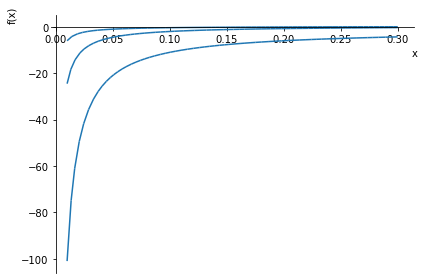

In [227]:
C1 = sym.Symbol('C1')
q1 = q.subs(C1, 1)
q2 = q.subs(C1, 0.5)
q3 = q.subs(C1, -2)

sym.plot(q1.rhs, q2.rhs, q3.rhs, (x, 0.01, 0.3))

## Численное решение уравнений

### 2)	Постройте график функци f(x) = exp(x)-(x+3)**2+8, и численно найдите корни уравнения f(x)=0.

Корни: -5.828947007701291 0.0 3.55409458599234


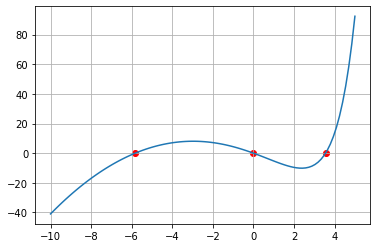

In [264]:
from scipy.optimize import root
f = sym.lambdify(x, sym.exp(x) - (x + 3)**2 + 8)


x_list = np.linspace(-10, 5, 100)
y_list = []
for xi in x_list:
    y_list.append(f(xi))

plt.grid(True)
plt.plot(x_list, y_list)

roots = [root(f, -6).x[0], root(f, 0).x[0], root(f, 3).x[0]]
print('Корни:', *roots)
for root in roots:
    plt.scatter(root, f(root), c='r')

### 8)	Численно решите систему уравнений для различных начальных условий, и постройте фазовый портрет системы (кривые y(x)): 

x' = 4 - 4*x - 2 * y

y' = x * y

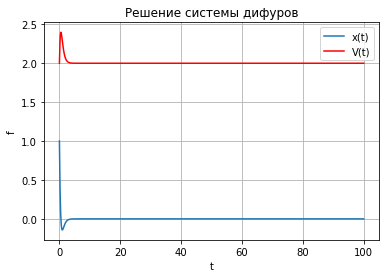

In [318]:
from scipy.integrate import odeint

def odesys(x, t):
    dx0 = 4 - 4 * x[0] - 2 * x[1]
    dx1 = x[0] * x[1]
    return [dx0, dx1]

x0 = [1, 2]
t = np.linspace(0, 100, 1000)
X = odeint(odesys, x0, t)
plt.plot(t,X[:,0])
plt.plot(t,X[:,1],color='red')
plt.xlabel('t')
plt.ylabel('f')
plt.title('Решение системы дифуров')
plt.grid()
plt.legend(["x(t)","V(t)"])

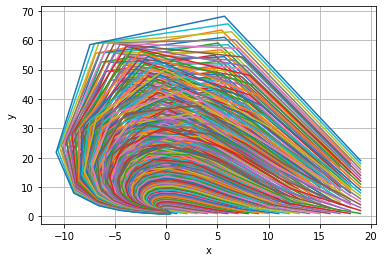

In [321]:

for i in range(1, 10, 1):
    for j in range(1, 20, 1):
        x0 = [i, j]
        X = odeint(odesys, x0, t)
        plt.plot(X[:,0],X[:,1])


plt.xlabel('x')
plt.ylabel('y')
plt.grid()